In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from user_space_models import generate_user_space

In [53]:
some_space = generate_user_space(n_users= 20,
                        n_cleavage=10, 
                        n_non_cleavage=10,
                        n_noise=10,
                        n_unifying_topics=10,
                        unification_point = 0,
                        cleavage_alignment=0.7,
                        non_cleavage_alignment=0.9,
                        bimodal_polarization_strength=15,
                        non_polarization_attraction= 2,
                        clevage_alignment_noise=0.4,
                        non_cleavage_alignment_noise=0.7,
                        unification_strength = 100,
                        unification_alignment_noise= 0.01,
                        noise_topic_noise= 1)


<Axes: >

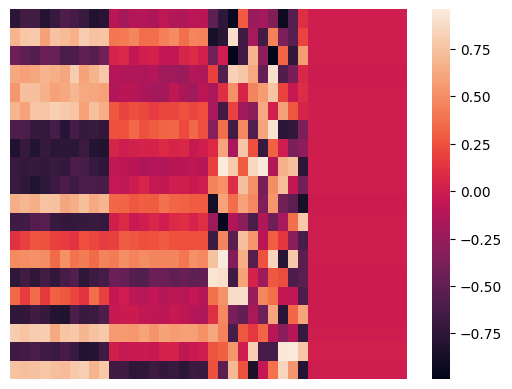

In [54]:
import seaborn as sns
sns.heatmap(some_space, cmap= 'rocket', xticklabels=False, yticklabels=False)